In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Generate data with a quadratic relationship
np.random.seed(42)
X = np.random.rand(30, 1) * 10  # 30 random points between 0 and 10
Y = X ** 2 + np.random.randn(30, 1) * 5  # Quadratic relation with noise

In [3]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
# Fit a high-degree polynomial regression (degree 15) to cause overfitting
poly = PolynomialFeatures(degree=15)
X_poly_train = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly_train, Y_train)

LinearRegression()

In [5]:
# Make predictions on both training and test data
Y_train_pred = model.predict(X_poly_train)
X_poly_test = poly.transform(X_test)
Y_test_pred = model.predict(X_poly_test)

In [6]:
# Generate a range of X values for the plot
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
Y_range_pred = model.predict(poly.transform(X_range))

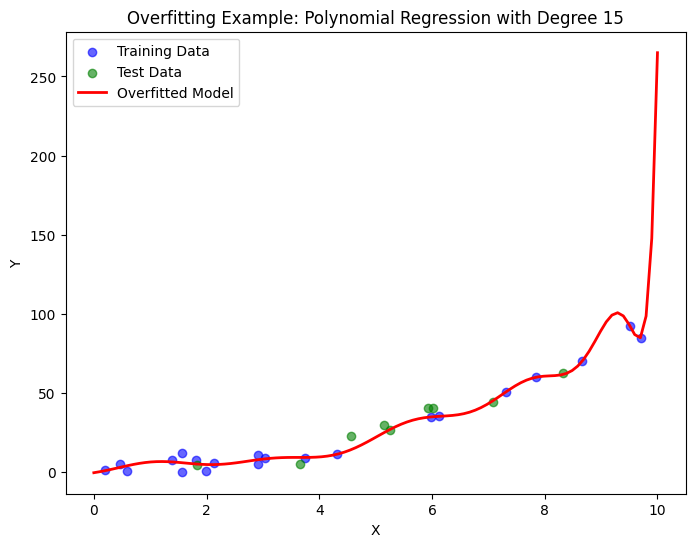

In [7]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, label='Training Data', color='blue', alpha=0.6)
plt.scatter(X_test, Y_test, label='Test Data', color='green', alpha=0.6)
plt.plot(X_range, Y_range_pred, color='red', label='Overfitted Model', linewidth=2)

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Overfitting Example: Polynomial Regression with Degree 15')
plt.legend()
plt.show()

In [8]:
#Solution
# Fit a lower-degree polynomial regression model (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly_train, Y_train)

LinearRegression()

In [9]:
# Predict for the plot
Y_range_pred = model.predict(poly.transform(X_range))

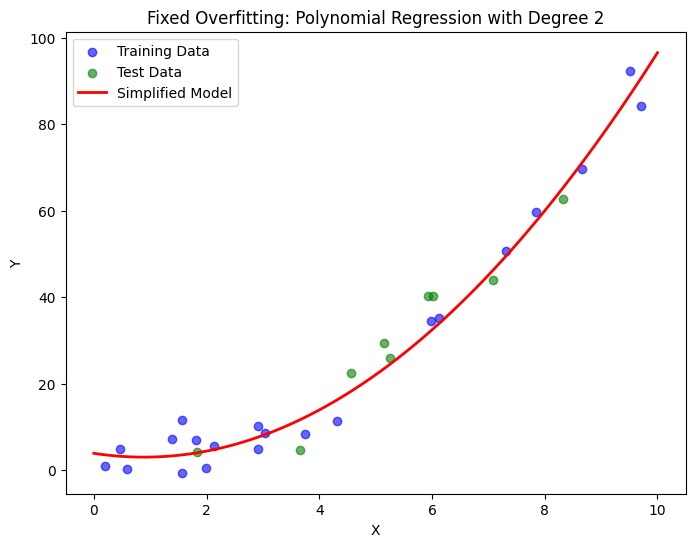

In [10]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, label='Training Data', color='blue', alpha=0.6)
plt.scatter(X_test, Y_test, label='Test Data', color='green', alpha=0.6)
plt.plot(X_range, Y_range_pred, color='red', label='Simplified Model', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fixed Overfitting: Polynomial Regression with Degree 2')
plt.legend()
plt.show()